## Solving MNIST using PyTorch

In [1]:
import torch
import torchvision ## Contains some utilities for working with the image data
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
#%matplotlib inline
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [2]:
dataset = MNIST(root = 'data/', download = True)
print(len(dataset))

100.0%
100.0%
100.0%
100.0%

60000


Label: 3


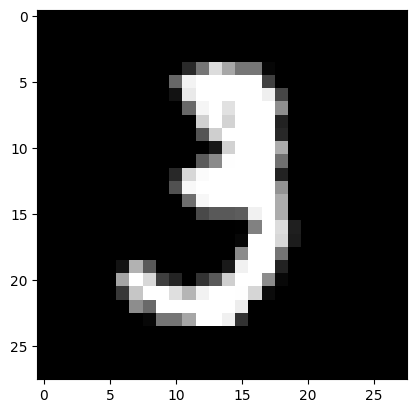

In [3]:
image, label = dataset[10]
plt.imshow(image, cmap = 'gray')
print('Label:', label)

In [4]:
mnist_dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor())
print(mnist_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [5]:
image_tensor, label = mnist_dataset[0]
print(image_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [6]:
print(image_tensor[:,10:15,10:15])
print(torch.max(image_tensor), torch.min(image_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


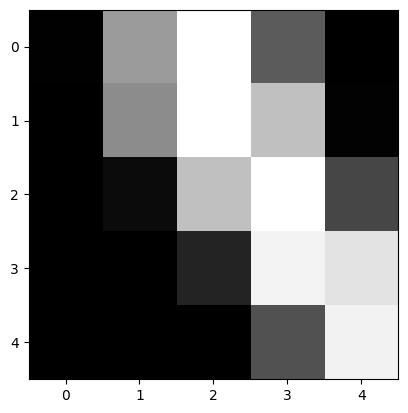

In [7]:
plt.imshow(image_tensor[0,10:15,10:15],cmap = 'gray')

In [8]:
train_data, validation_data = random_split(mnist_dataset, [50000, 10000])
## Print the length of train and validation datasets
print("length of Train Datasets: ", len(train_data))
print("length of Validation Datasets: ", len(validation_data))

length of Train Datasets:  50000
length of Validation Datasets:  10000


In [9]:
batch_size = 128
train_loader = DataLoader(train_data, batch_size, shuffle = True)
val_loader = DataLoader(validation_data, batch_size, shuffle = False)

In [10]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

## Logistic regression model
model = nn.Linear(input_size, num_classes)
print(model.weight.shape)
print(model.weight)
print(model.bias.shape)
print(model.bias)

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0229, -0.0060,  0.0223,  ..., -0.0105,  0.0167, -0.0134],
        [-0.0244,  0.0344, -0.0192,  ..., -0.0035,  0.0089,  0.0260],
        [-0.0044,  0.0053, -0.0198,  ..., -0.0246, -0.0308,  0.0196],
        ...,
        [-0.0133, -0.0335,  0.0299,  ..., -0.0286, -0.0321, -0.0313],
        [ 0.0117, -0.0216, -0.0341,  ..., -0.0347,  0.0331, -0.0193],
        [-0.0084, -0.0018, -0.0306,  ...,  0.0217,  0.0070, -0.0294]],
       requires_grad=True)
torch.Size([10])
Parameter containing:
tensor([-0.0147,  0.0339,  0.0287, -0.0004, -0.0153,  0.0185, -0.0011, -0.0238,
        -0.0159, -0.0128], requires_grad=True)


In [11]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([3, 8, 3, 6, 8, 2, 7, 2, 4, 0, 4, 9, 0, 2, 6, 9, 9, 2, 0, 6, 0, 6, 7, 9,
        8, 8, 1, 7, 0, 9, 1, 8, 8, 8, 4, 8, 1, 1, 4, 7, 5, 2, 3, 3, 4, 3, 8, 0,
        0, 7, 1, 5, 8, 7, 6, 7, 3, 0, 3, 6, 8, 4, 0, 2, 9, 2, 8, 7, 2, 7, 0, 5,
        6, 0, 4, 0, 1, 5, 3, 7, 8, 2, 5, 3, 8, 4, 8, 7, 0, 0, 8, 7, 0, 0, 5, 4,
        6, 5, 3, 1, 4, 4, 3, 1, 1, 7, 0, 9, 1, 7, 2, 9, 1, 0, 1, 9, 2, 9, 2, 4,
        3, 9, 5, 5, 0, 9, 8, 5])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [12]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        print(xb)
        out = self.linear(xb)
        print(out)
        return(out)

model = MnistModel()
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0176, -0.0010,  0.0288,  ..., -0.0132, -0.0242,  0.0198],
         [ 0.0115,  0.0356, -0.0306,  ...,  0.0159, -0.0011,  0.0356],
         [-0.0183,  0.0131,  0.0281,  ...,  0.0285, -0.0007,  0.0046],
         ...,
         [ 0.0175,  0.0113, -0.0326,  ...,  0.0063,  0.0119,  0.0096],
         [ 0.0215,  0.0007, -0.0263,  ...,  0.0293,  0.0352, -0.0256],
         [-0.0141,  0.0281, -0.0142,  ...,  0.0170, -0.0198, -0.0327]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0215,  0.0341, -0.0112, -0.0113, -0.0299,  0.0164,  0.0090, -0.0171,
          0.0007,  0.0328], requires_grad=True)]

In [13]:
for images, labels in train_loader:
    outputs = model(images)
    break
    
print('outputs shape: ', outputs.shape)
print('Sample outputs: \n', outputs[:2].data)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.0161, -0.1487,  0.0476,  ..., -0.2248,  0.2088,  0.1805],
        [ 0.1576, -0.1614, -0.0906,  ..., -0.2823, -0.0031,  0.1440],
        [ 0.2299,  0.0217,  0.1508,  ..., -0.2557,  0.1440,  0.1877],
        ...,
        [ 0.1325, -0.4477, -0.2499,  ..., -0.0564, -0.0825,  0.1802],
        [ 0.1568, -0.3148,  0.4155,  ..., -0.3144,  0.0014,  0.4689],
        [ 0.0877, -0.3125, -0.1353,  ..., -0.1754,  0.1328,  0.2286]],
       grad_fn=<AddmmBackward0>)
outputs shape:  torch.Size([128, 10])
Sample outputs: 
 tensor([[ 0.0161, -0.1487,  0.0476,  0.0122,  0.0848,  0.0445, -0.2001, -0.2248,
          0.2088,  0.1805],
        [ 0.1576, -0.1614, -0.0906, -0.0275, -0.0705,  0.1004,  0.0703, -0.2823,
         -0.0031,  0.1440]])


In [14]:
## Apply softmax for each output row
probs = F.softmax(outputs, dim = 1)

## chaecking at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

print("\n")
## Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())
max_probs, preds = torch.max(probs, dim = 1)
print("\n")
print(preds)
print("\n")
print(max_probs)

Sample probabilities:
 tensor([[0.1004, 0.0852, 0.1036, 0.1000, 0.1076, 0.1033, 0.0809, 0.0789, 0.1218,
         0.1184],
        [0.1180, 0.0857, 0.0920, 0.0980, 0.0939, 0.1114, 0.1081, 0.0760, 0.1005,
         0.1164]])


Sum:  1.0000001192092896


tensor([8, 0, 0, 8, 9, 9, 3, 3, 9, 9, 9, 3, 8, 8, 5, 8, 5, 5, 9, 4, 9, 5, 5, 9,
        8, 8, 3, 9, 9, 0, 9, 0, 0, 5, 9, 4, 5, 8, 8, 8, 3, 5, 9, 8, 5, 9, 9, 5,
        9, 9, 9, 8, 9, 3, 5, 5, 5, 3, 3, 5, 9, 0, 9, 0, 5, 9, 0, 9, 9, 3, 9, 9,
        9, 1, 9, 9, 8, 9, 9, 8, 8, 5, 9, 9, 0, 9, 9, 5, 9, 8, 8, 0, 9, 5, 9, 8,
        8, 5, 9, 9, 8, 9, 0, 0, 8, 0, 9, 9, 1, 4, 9, 0, 5, 8, 8, 8, 9, 8, 9, 5,
        8, 5, 8, 8, 9, 5, 9, 9])


tensor([0.1218, 0.1180, 0.1172, 0.1380, 0.1820, 0.1270, 0.1156, 0.1273, 0.1212,
        0.1557, 0.1467, 0.1399, 0.1443, 0.1218, 0.1219, 0.1388, 0.1179, 0.1244,
        0.1209, 0.1243, 0.1296, 0.1218, 0.1318, 0.1263, 0.1352, 0.1309, 0.1300,
        0.1426, 0.1308, 0.1441, 0.1198, 0.1241, 0.1251, 0.1739, 0.1313, 0.

In [ ]:
labels

tensor([4, 0, 7, 5, 6, 9, 0, 8, 2, 3, 3, 0, 5, 4, 5, 9, 1, 8, 4, 7, 8, 1, 1, 9,
        0, 9, 7, 6, 8, 0, 5, 9, 9, 8, 8, 7, 1, 0, 2, 3, 3, 5, 2, 3, 1, 8, 8, 1,
        4, 8, 2, 0, 8, 3, 1, 1, 6, 9, 8, 1, 7, 3, 3, 7, 6, 2, 0, 4, 6, 4, 5, 6,
        5, 7, 9, 3, 9, 9, 3, 6, 0, 1, 6, 8, 4, 3, 9, 1, 2, 6, 2, 3, 2, 8, 2, 5,
        7, 1, 3, 3, 9, 8, 2, 7, 0, 4, 3, 9, 7, 7, 8, 1, 1, 9, 0, 3, 8, 0, 8, 4,
        2, 2, 3, 7, 3, 2, 8, 2])

In [16]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return(torch.tensor(torch.sum(preds == labels).item()/ len(preds)))

print("Accuracy: ",accuracy(outputs, labels))
print("\n")
loss_fn = F.cross_entropy
print("Loss Function: ",loss_fn)
print("\n")
## Loss for the current batch
loss = loss_fn(outputs, labels)
print(loss)

Accuracy:  tensor(0.1016)


Loss Function:  <function cross_entropy at 0x0000026A5664D090>


tensor(2.3021, grad_fn=<NllLossBackward0>)


In [17]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return(out)
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images) ## Generate predictions
        loss = F.cross_entropy(out, labels) ## Calculate the loss
        return(loss)
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return({'val_loss':loss, 'val_acc': acc})
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return({'val_loss': epoch_loss.item(), 'val_acc' : epoch_acc.item()})
    
    def epoch_end(self, epoch,result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
        
    
model = MnistModel()

In [18]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return(model.validation_epoch_end(outputs))

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        
        ## Training Phas
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        ## Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return(history)

In [19]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3291332721710205, 'val_acc': 0.08999209105968475}

In [20]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9629, val_acc: 0.6108
Epoch [1], val_loss: 1.6941, val_acc: 0.7232
Epoch [2], val_loss: 1.4924, val_acc: 0.7572
Epoch [3], val_loss: 1.3397, val_acc: 0.7766
Epoch [4], val_loss: 1.2222, val_acc: 0.7915


In [21]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1297, val_acc: 0.8008
Epoch [1], val_loss: 1.0555, val_acc: 0.8092
Epoch [2], val_loss: 0.9947, val_acc: 0.8167
Epoch [3], val_loss: 0.9442, val_acc: 0.8213
Epoch [4], val_loss: 0.9015, val_acc: 0.8254


In [22]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8648, val_acc: 0.8286
Epoch [1], val_loss: 0.8330, val_acc: 0.8313
Epoch [2], val_loss: 0.8053, val_acc: 0.8340
Epoch [3], val_loss: 0.7807, val_acc: 0.8371
Epoch [4], val_loss: 0.7588, val_acc: 0.8394


In [23]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7392, val_acc: 0.8422
Epoch [1], val_loss: 0.7215, val_acc: 0.8444
Epoch [2], val_loss: 0.7055, val_acc: 0.8467
Epoch [3], val_loss: 0.6908, val_acc: 0.8479
Epoch [4], val_loss: 0.6773, val_acc: 0.8498


Text(0.5, 1.0, 'Accuracy Vs. No. of epochs')

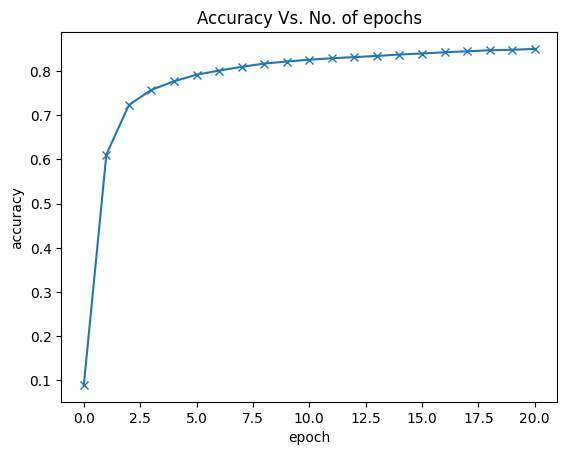

In [24]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy Vs. No. of epochs')

In [25]:
test_dataset = MNIST(root = 'data/', train = False, transform = transforms.ToTensor())

shape:  torch.Size([1, 28, 28])
Label:  7


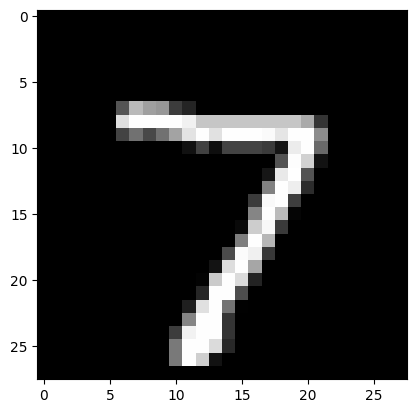

In [26]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print("shape: ", img.shape)
print('Label: ', label)

In [27]:
print(img.unsqueeze(0).shape)
print(img.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 28, 28])


In [28]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim = 1)
    return(preds[0].item())

Label: 7 , Predicted : 7


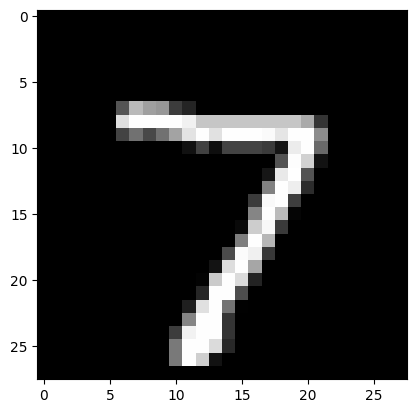

In [29]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print('Label:', label, ', Predicted :', predict_image(img, model))

Label: 9 ,Predicted: 9


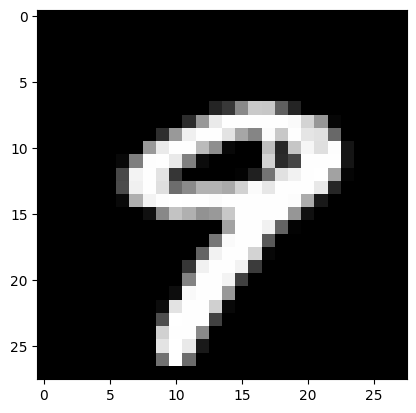

In [30]:
img, label = test_dataset[9]
plt.imshow(img[0], cmap = 'gray')
print("Label:", label, ',Predicted:', predict_image(img, model))

Label: 0 ,Predicted: 0


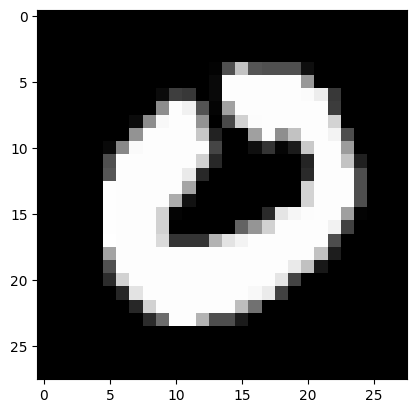

In [31]:
img, label = test_dataset[25]
plt.imshow(img[0], cmap = 'gray')
print("Label:", label, ',Predicted:', predict_image(img, model))

Label: 3 ,Predicted: 3


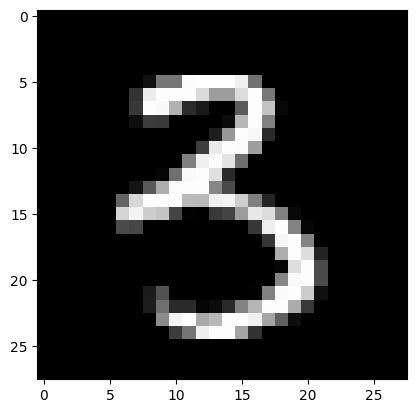

In [32]:
img, label = test_dataset[5000]
plt.imshow(img[0], cmap = 'gray')
print("Label:", label, ',Predicted:', predict_image(img, model))

In [33]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6417706608772278, 'val_acc': 0.86083984375}

In [34]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [35]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0200,  0.0043, -0.0109,  ..., -0.0317,  0.0312, -0.0036],
                      [-0.0248, -0.0337, -0.0336,  ...,  0.0067, -0.0046,  0.0285],
                      [-0.0044, -0.0043, -0.0109,  ...,  0.0241,  0.0069, -0.0159],
                      ...,
                      [-0.0265,  0.0273, -0.0310,  ..., -0.0158,  0.0086,  0.0185],
                      [ 0.0275,  0.0211,  0.0067,  ...,  0.0168, -0.0270, -0.0224],
                      [ 0.0074, -0.0322, -0.0056,  ..., -0.0078, -0.0153, -0.0207]])),
             ('linear.bias',
              tensor([-0.0754,  0.0859, -0.0107, -0.0322,  0.0573,  0.0546, -0.0235,  0.0577,
                      -0.1050, -0.0135]))])

In [36]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0200,  0.0043, -0.0109,  ..., -0.0317,  0.0312, -0.0036],
                      [-0.0248, -0.0337, -0.0336,  ...,  0.0067, -0.0046,  0.0285],
                      [-0.0044, -0.0043, -0.0109,  ...,  0.0241,  0.0069, -0.0159],
                      ...,
                      [-0.0265,  0.0273, -0.0310,  ..., -0.0158,  0.0086,  0.0185],
                      [ 0.0275,  0.0211,  0.0067,  ...,  0.0168, -0.0270, -0.0224],
                      [ 0.0074, -0.0322, -0.0056,  ..., -0.0078, -0.0153, -0.0207]])),
             ('linear.bias',
              tensor([-0.0754,  0.0859, -0.0107, -0.0322,  0.0573,  0.0546, -0.0235,  0.0577,
                      -0.1050, -0.0135]))])

In [37]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6417706608772278, 'val_acc': 0.86083984375}